# Hypothesis Testing

In this project we'll be exploring basic hypothesis testing. What is a hypothesis test? It's a way to check the likliehood of a proposed statistical outcome. What follows are some examples of hypothesis tests and the way we can characterise the evidence we have to support some statistical conjecture. So let's get started!

The basic idea of a hypothesis test is to

1. Find a way to measure the size of the effect. This is called the *test* *statistic*
2. Next define a *null* *hypothesis* (that there is no effect).
3. Compute a `p-value` the probability of measuring the size witnessed if the null hypothesis is *true*
4. Finally, interpret the result. If the p-value is low, then the effect is *statistically* *significant*.

This is the entire point. There are many different tests and approaches to performing these four steps in different circumstances, but this is how you can think about it.
    
Let's see how this works in a [concrete example](http://greenteapress.com/thinkstats2/html/thinkstats2010.html#sec90). Suppose I have a coin that I flip 250 times. Suppose I see 140 heads (and 110 tails). Is the coin fair? Let's go through the steps:

1. How do we measure the effect?

    Easy! Let's take the difference between the number of heads and the number of tails: x = 140-110 = 30

2. The null hypothesis is that "there is no effect", or the coin is fair. 

    In other words we expect x to be zero.

3. How do we compute the p-value?

    This is the probability of seeing a difference of 30 if the coin is *fair*.

This is the fun part! Let's throw a coin 250 times:


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N=250

TrueFalseFlipArray = np.random.rand(N)<0.5

print(TrueFalseFlipArray[:10])
print('-----')

# remember "True" is like 1 and False" is like "0" so "count_nonzero" counts the True elements only.

numHeads = TrueFalseFlipArray.sum()
print("num heads:", numHeads)

[False False False False False  True False False  True False]
-----
num heads: 114


So we can flip 250 coins and count the number of heads. We have to do this *many* times and then estimate the chance of getting an absolute difference between heads and tails of 30 or more. Let's use a 2D array for that. To make it more manageable let's start with 5 trials (columns) of 10 flips (rows) each:

In [2]:
N = 10
iters = 5

data = np.random.rand(N,iters)<0.5
data

array([[ True,  True, False,  True, False],
       [False, False, False,  True, False],
       [False, False,  True, False,  True],
       [ True, False, False, False, False],
       [ True, False, False, False,  True],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False, False],
       [ True, False,  True, False, False],
       [False, False, False, False,  True],
       [ True, False, False,  True,  True]])

Now let's sum the columns (trials):

In [3]:
heads = data.sum(axis=0)
heads

array([6, 2, 4, 4, 5])

In [4]:
tails = N-heads
tails

array([4, 8, 6, 6, 5])

In [5]:
tails+heads

array([10, 10, 10, 10, 10])

In [6]:
print("So the first column had %d heads, while the second had %d heads, and so on." % (heads[0], heads[1]))

So the first column had 6 heads, while the second had 2 heads, and so on.


(array([  3.,  13.,  53., 178., 273., 252., 162.,  52.,  12.,   2.]),
 array([-58., -46., -34., -22., -10.,   2.,  14.,  26.,  38.,  50.,  62.]),
 <a list of 10 Patch objects>)

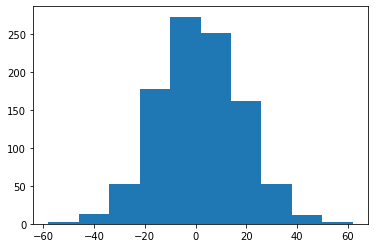

In [7]:
# Let's bump it up to 1000 iterations (trials) of 250 flips:

N = 250
iters = 1000

data = np.random.rand(N,iters)<0.5
heads = data.sum(axis=0)
tails = N - heads

plt.hist(heads-tails)

In [8]:
(abs(heads-tails)>=30).sum()/iters

0.068

So the chance of getting a difference of 30 or more is about 7%. That's the `p-value`.

## Differences between two data sets

What if I make a series of 20 measurements:

In [9]:
x1 = np.array([3.25466863, 2.97370402, 2.91113498, 3.4574893 , 3.17937048,
       3.03048094, 3.21812428, 2.81350504, 2.9976349 , 2.97788408,
       3.1813029 , 2.87498481, 2.90372449, 3.46095383, 3.11570786,
       2.69100383, 2.97142051, 2.72968174, 2.48244642, 2.8584929 ])
x1

array([3.25466863, 2.97370402, 2.91113498, 3.4574893 , 3.17937048,
       3.03048094, 3.21812428, 2.81350504, 2.9976349 , 2.97788408,
       3.1813029 , 2.87498481, 2.90372449, 3.46095383, 3.11570786,
       2.69100383, 2.97142051, 2.72968174, 2.48244642, 2.8584929 ])

And then I make another seriels:

In [10]:
x2 = np.array([3.58365047, 3.04506491, 3.35190893, 2.76485786, 3.8494015 ,
       3.17593123, 3.03499338, 2.31533078, 2.58647626, 3.47397813,
       2.9985396 , 3.46170964, 3.23908075, 2.78904992, 3.000179  ,
       3.23386923, 3.10856455, 3.24167989, 2.92353227, 3.09131427])
x2

array([3.58365047, 3.04506491, 3.35190893, 2.76485786, 3.8494015 ,
       3.17593123, 3.03499338, 2.31533078, 2.58647626, 3.47397813,
       2.9985396 , 3.46170964, 3.23908075, 2.78904992, 3.000179  ,
       3.23386923, 3.10856455, 3.24167989, 2.92353227, 3.09131427])

In [11]:
x1_mean = x1.mean()
x2_mean = x2.mean()

print("They have different means: <x1>=%4.3f <x2>=%4.3f -> <x2-x1> = %4.3f" % (x1_mean, x2_mean, x2_mean-x1_mean))

They have different means: <x1>=3.004 <x2>=3.113 -> <x2-x1> = 0.109


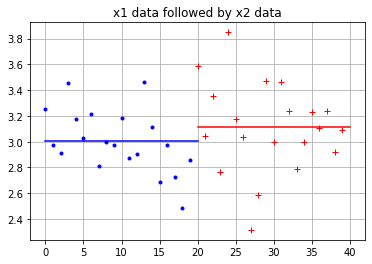

In [12]:
plt.plot(range(len(x1)), x1, 'b.')
plt.plot(np.arange(len(x2))+len(x1), x2, 'r+')
plt.plot((0,len(x1)),(x1_mean,x1_mean),'b-')
plt.plot((len(x1),len(x1)+len(x2)),(x2_mean,x2_mean),'r-')
plt.title("x1 data followed by x2 data")
plt.grid()

Now, the question is: Is this difference *real*, or just a statistical fluctuation?

1. What's my test statistic?

    It appears that `<x2> > <x1>`, so maybe I should use `<x2> - <x1>`. Make sense?    

2. The null hypothesis would be that `<x2> - <x1>` is zero.

   How do we compute the `p-value`? One way is to put all the data into a pot, stir it up, and pull out two sets at random that have the same size as the original sets. For these two random sets, compute the difference of their means. Let's try that!

Text(0.5, 1.0, 'mean differences of shuffled data')

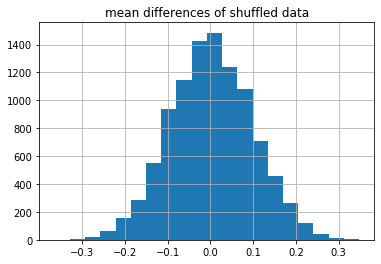

In [13]:
iters = 10000
all_data = np.append(x1, x2)  # put all the data in one pot
mean_diffs = []

for i in range(iters):
    np.random.shuffle(all_data)                # stir the pot
    x1_mean_test = np.mean(all_data[:len(x1)]) # get mean of the first lot, like the original x1
    x2_mean_test = np.mean(all_data[len(x1):]) # get the mean of the second lot, like the original x2
    mean_diffs.append(x2_mean_test - x1_mean_test) # compute the difference of means and collect
    
mean_diffs = np.array(mean_diffs)  # convert to numpy array
plt.hist(mean_diffs,20)
plt.grid()
plt.title("mean differences of shuffled data")

# Exercises

1. Now it's your turn. You have a numpy array of differences of means. What's the `p-value` of finding a difference greater than or equal to the observed difference in your data of 0.109? (Answer: approximately 0.127)

2. How do you interpret this `p-value`? Are the measured difference statistically significant?

3. For your lab data, carry out a hypothesis test to support or refute your measurement of an effect.